# ANN Coursework - ResNet50 Technique

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import pathlib
import cv2
from tensorflow.keras import layers
from sklearn.model_selection import KFold, StratifiedKFold
import glob
import csv
import numpy as np
import pandas as pd
import os
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
import pathlib
from IPython.display import Image, display
import os, random

In [2]:
data_train = r"C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Training"
data_test = r"C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Testing"

path_train = pathlib.Path(data_train)
path_test = pathlib.Path(data_test)

print(path_train)
image_count_train = len(list(path_train.glob('*/*.jpg')))
print(image_count_train)

print(path_test)
image_count_test = len(list(path_test.glob('*/*.jpg')))
print(image_count_test)

C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Training
2870
C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Testing
394


In [3]:
data_generator = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   )

image_size = 128
batch_size = 10
train_generator = data_generator.flow_from_directory(data_train,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

num_classes = len(train_generator.class_indices)

Found 2870 images belonging to 4 classes.


# Model Creation

In [4]:
resnet_model = Sequential()

resnet_model.add(ResNet50(include_top=False, pooling='avg', weights=None)) # check the weights
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(2048, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(num_classes, activation='softmax'))

resnet_model.layers[0].trainable = False

In [5]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = resnet_model.fit_generator(
        train_generator,
        steps_per_epoch=57,
        epochs=2)

C:\Users\giorg\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
57/57 [==============================] - 23s 332ms/step - loss: 2.8216 - accuracy: 0.2812
Epoch 2/2
57/57 [==============================] - 19s 334ms/step - loss: 1.3946 - accuracy: 0.4016


# Model Evaluation

In [14]:
from IPython.display import Image, display

import os, random
img_locations = []
for d in os.listdir(r"C:/Users/giorg/Jupyter notebooks/Artificial Neural Networks_CW\BrainTumor/Training"):
    directory = r"C:/Users/giorg/Jupyter notebooks/Artificial Neural Networks_CW/BrainTumor/Training/" + d
    sample = [directory + '/' + s for s in random.sample(
        os.listdir(directory), int(random.random()*10))]
    img_locations += sample

C:\Users\giorg\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


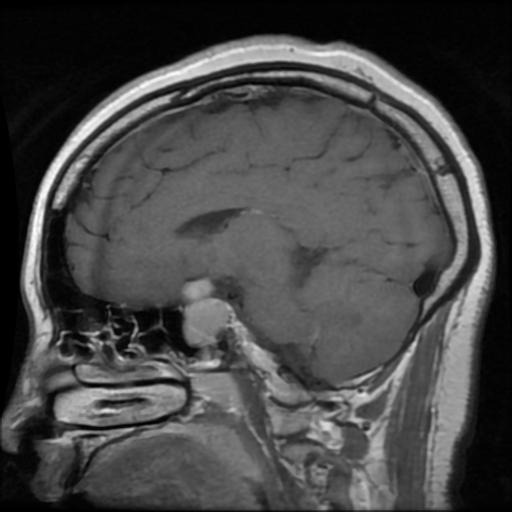

no_tumor


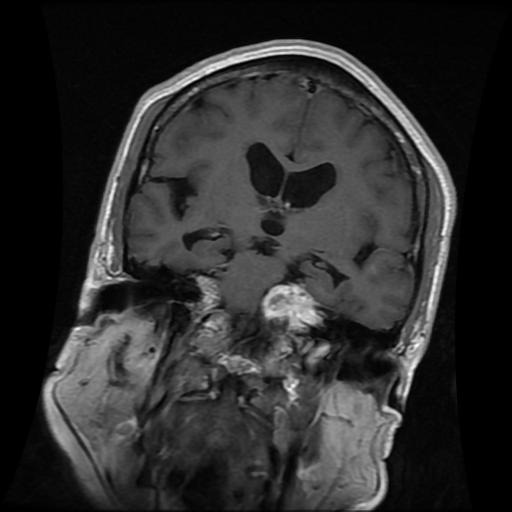

no_tumor


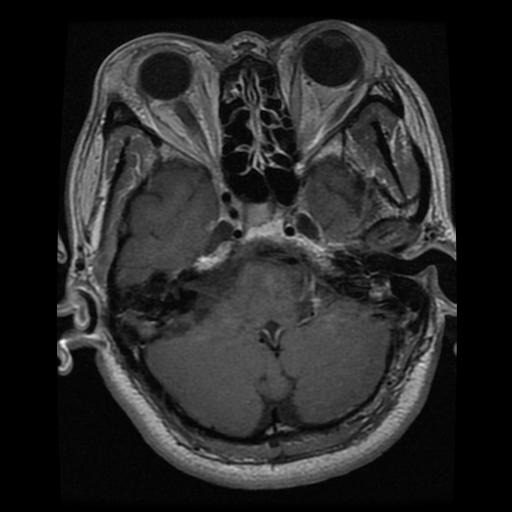

no_tumor


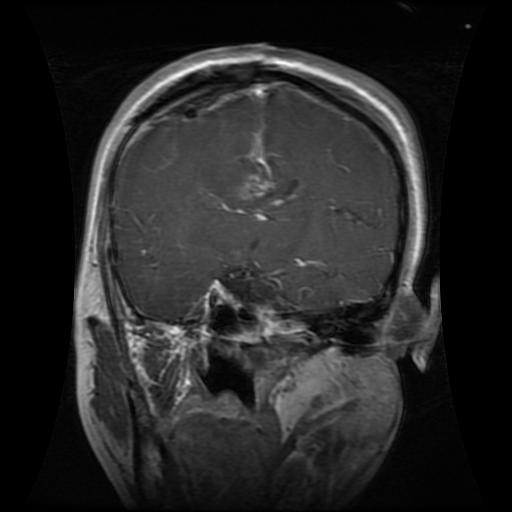

no_tumor


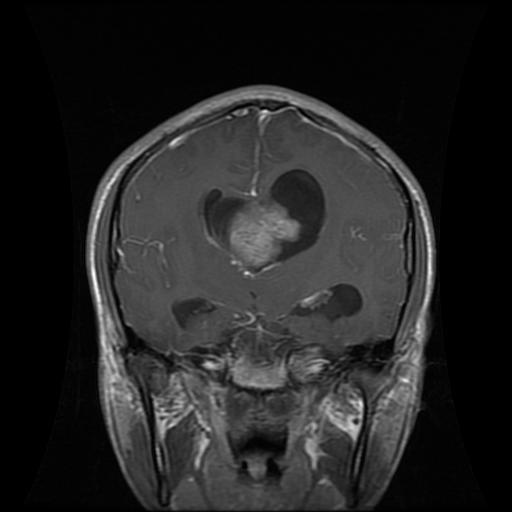

no_tumor


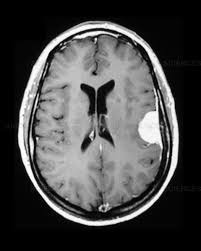

no_tumor


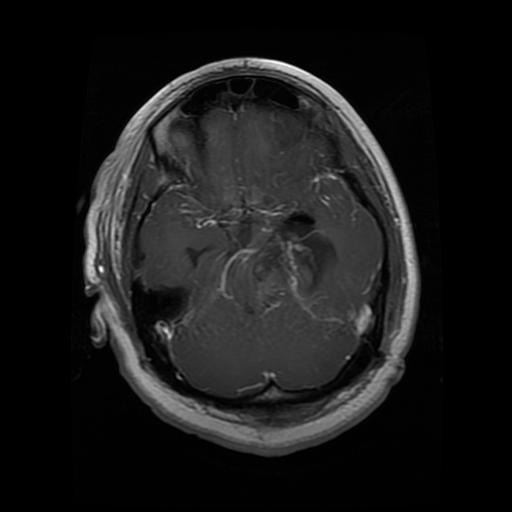

no_tumor


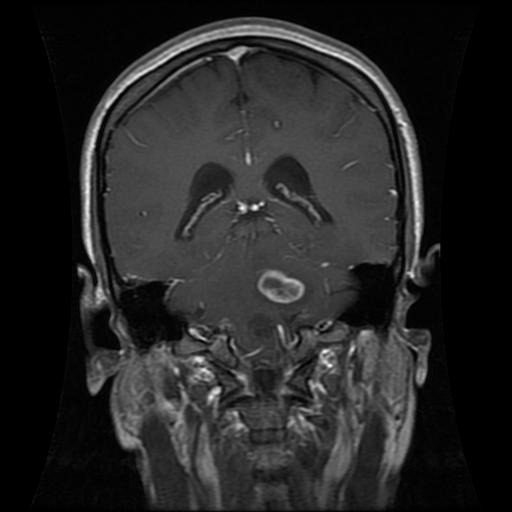

no_tumor


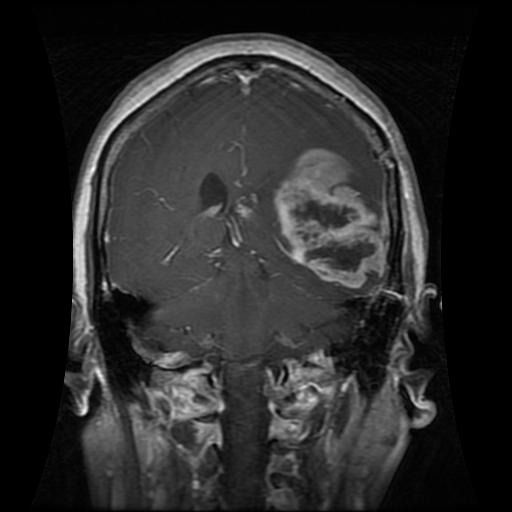

no_tumor


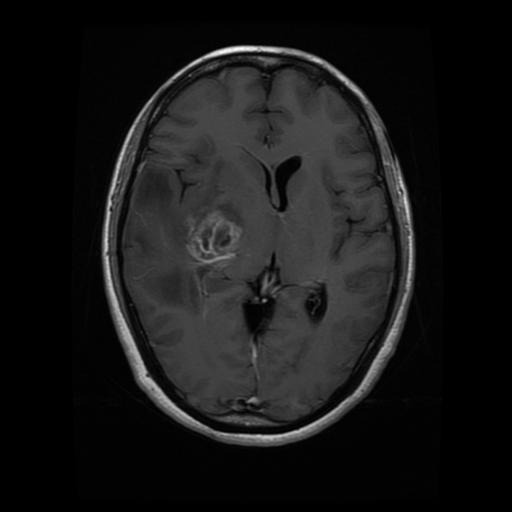

no_tumor


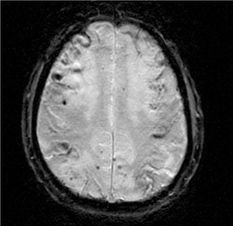

no_tumor


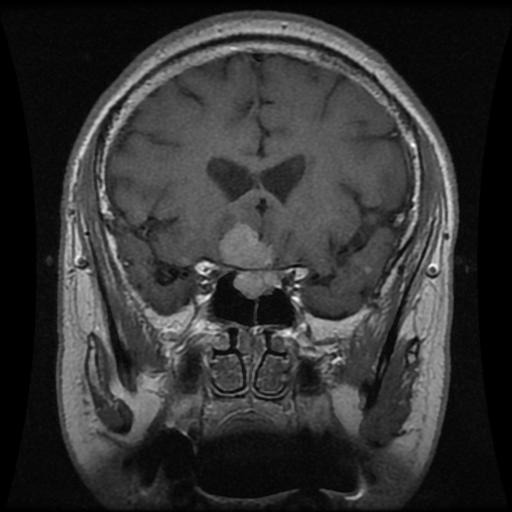

no_tumor


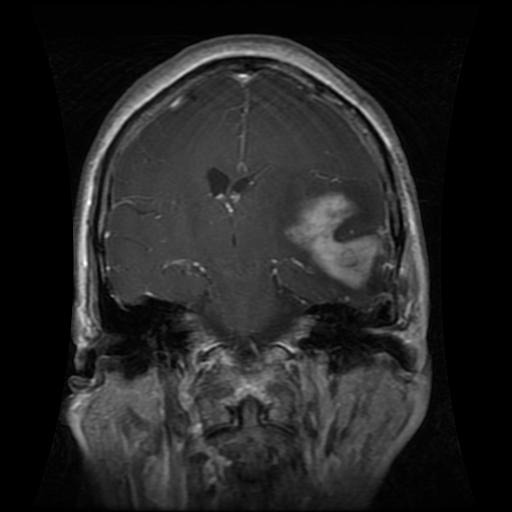

no_tumor


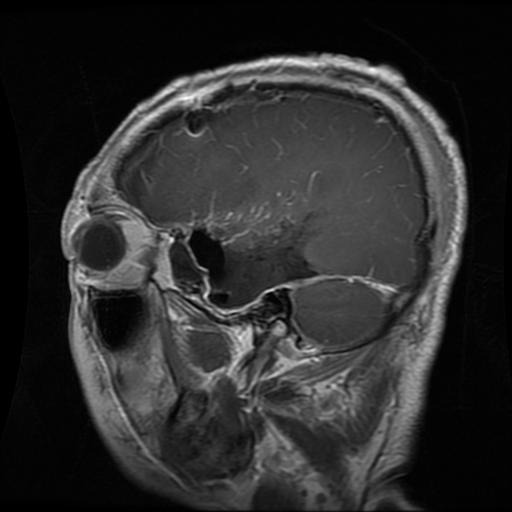

no_tumor


In [16]:
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

random.shuffle(img_locations)
imgs = read_and_prep_images(img_locations)
predictions = resnet_model.predict_classes(imgs)
classes = dict((v,k) for k,v in train_generator.class_indices.items())

for img, prediction in zip(img_locations, predictions):
    display(Image(img))
    print(classes[prediction])